# Overfitting

![](../../images/overf_1.png)

Về cơ bản, việc overfitting xảy ra khi mô hình quá phức tạp để mô phỏng training data. Điều này đặc biệt xảy ra khi lương dữ liệu training quá nhỏ trong khi độ phức tạp của mô hình quá cao. Trong neural network, độ phức tạp có thể coi là số lượng hidden layers và số lượng units trong các hidden layers.

Có một cách đánh giá việc overfitting dựa trên hàm mất mát của training data và test data. Đối với training data regression ta có:

![](../../images/overf_2.png)

Đối với test data:

![](../../images/overf_3.png)



Mong muốn của ta là error có giá trị càng nhỏ => mô hình càng tốt

Như vậy dựa trên hình mô phỏng overfitting ta thấy có các trường hợp sau:

- train error thấp,  test error cao : Overfitting
- train error cao, test error cao: underfitting
- train error thấp, test error thấp: mô hình fit tôt
- train error cao, test error thấp : Mô hình hiếm khi xảy ra ( fit tốt mặc dù có train error cao) 

## Validation

Trong thực tế khi xây dựng mô hình ta sẽ không chia ra làm tập training và testing mà testing sẽ là dữ liệu thật. Thay vào đó ta chia training set ra làm hai phần, trong đó có một phần nhỏ để làm tập validation thay cho tập testing.

Việc đánh giá mô hình bây giờ dựa trên tập training và validation

![](../../images/overf_4.png)

(20, 1) (20, 1)


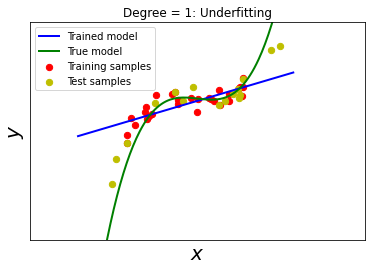

[[-41.90206792  12.66196586]]
(20, 1) (20, 1)


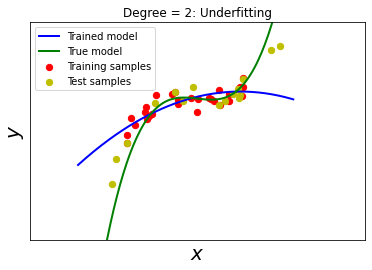

[[-52.79321911  27.33320281  -2.85491906]]
(20, 1) (20, 1)


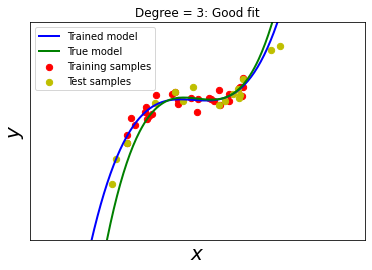

[[-70.86022078  78.7687132  -28.99387406   3.4286372 ]]
(20, 1) (20, 1)


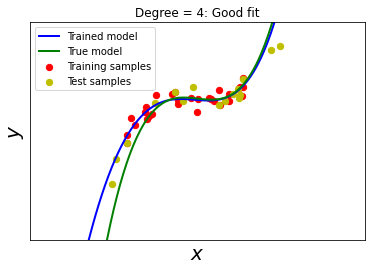

[[-70.11099235  74.66197229 -24.91080481   2.11241837   0.13285956]]
(20, 1) (20, 1)


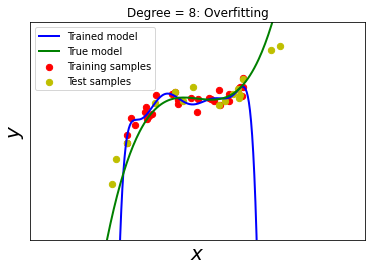

[[-8.31452004e+01  3.47714187e+02 -1.03309551e+03  1.48372383e+03
  -1.08580923e+03  4.36091506e+02 -9.77083149e+01  1.14715264e+01
  -5.50276444e-01]]
(20, 1) (20, 1)


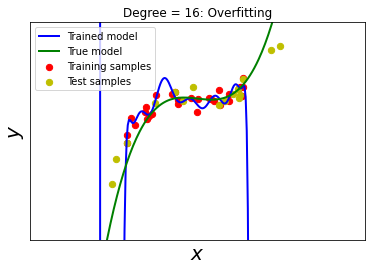

[[-1.13972143e+02  1.48509531e+03 -1.06959953e+04  3.60292183e+04
  -6.18737139e+04  5.04161834e+04 -1.05532643e+03 -3.90923449e+04
   4.21730732e+04 -2.45089752e+04  9.16646978e+03 -2.30845624e+03
   3.91275970e+02 -4.30326183e+01  2.80078360e+00 -8.49953122e-02
   3.07303406e-04]]


In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(4)
from sklearn import datasets, linear_model

N = 30
N_test = 20 
X = np.random.rand(N, 1)*5
y = 3*(X -2) * (X - 3)*(X-4) +  10*np.random.randn(N, 1)

X_test = (np.random.rand(N_test,1) - 1/8) *10
y_test = 3*(X_test -2) * (X_test - 3)*(X_test-4) +  10*np.random.randn(N_test, 1)

def buildX(X, d = 2):
    res = np.ones((X.shape[0], 1))
    for i in range(1, d+1):
        res = np.concatenate((res, X**i), axis = 1)
    return res 

def myfit(X, y, d):
    Xbar = buildX(X, d)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y)

    w = regr.coef_
    # Display result
    w_0 = w[0][0]
    w_1 = w[0][1]
    x0 = np.linspace(-2, 7, 200, endpoint=True)
    y0 = np.zeros_like(x0)
    ytrue = 5*(x0 - 2)*(x0-3)*(x0-4)
    for i in range(d+1):
        y0 += w[0][i]*x0**i

    # Draw the fitting line 
    plt.scatter(X.T, y.T, c = 'r', s = 40, label = 'Training samples')     # data 
    print(X_test.shape, y_test.shape)
    plt.scatter(X_test.T, y_test.T, c = 'y', s = 40, label = 'Test samples')     # data 
    
    plt.plot(x0, y0, 'b', linewidth = 2, label = "Trained model")   # the fitting line
    plt.plot(x0, ytrue, 'g', linewidth = 2, label = "True model")   # the fitting line
    plt.xticks([], [])
    plt.yticks([], [])
    if d < 3:
        str1 = 'Underfitting'
    elif d > 4:
        str1 = 'Overfitting'
    else:
        str1 = 'Good fit'
    str0 = 'Degree = ' + str(d) + ': ' + str1
    plt.title(str0)
    plt.axis([-4, 10, np.amin(y_test) - 100, np.amax(y) + 100])
    plt.legend(loc="best")
    
    fn = 'linreg_' + str(d) + '.png'
    
    plt.xlabel('$x$', fontsize = 20);
    plt.ylabel('$y$', fontsize = 20);
    
    # plt.savefig(fn, bbox_inches='tight', dpi = 600)
    
    plt.show()
    print(w)

myfit(X, y, 1)
myfit(X, y, 2)
myfit(X, y, 3)
myfit(X, y, 4)
myfit(X, y, 8)
myfit(X, y, 16)

# Một số phương pháp nhằm tránh overfitting

## 1. Validation set

Thông thường trong quá trình xây dựng model, ta chia tập dataset ra làm 2 phần là `training set` và `testing set`. Trong đó tập `training set` được dùng trong phase `training models` và tập `testing` được sử dụng để kiểm thử mô hình đã được training.

Ta thấy rằng trong quá trình `training models` muốn đánh giá mô hình có đang đi đúng hướng không thì ta không thể sử dụng `testing set` vì tập này mang ý nghĩa là tập dữ liệu `unseen`. Vì vậy ta trích một phần tập `training set` ra để thực hiện đánh giá mô hình trong quá trình training, tập này được gọi là `validation set`.

Với việc sử dụng `validation set` thì `training set` là phần còn lại của `init training set` được tách ra. Với khái niệm này, mô hình của ta cần phải đáp ứng sao cho `train error` và `validation error` đều phải nhỏ, từ đó ta suy ra được rằng `test error` cũng nhỏ => Giảm thiểu overfitting => mô hình tốt.

Việc chọn ra `validation set` giúp tránh overfitting do trong quá trình training nếu validate cho thấy sự tăng đột biến của error => ta có thể dừng quá trình training `early stopping`.

## 2. Cross-validation

Cần chú ý chọn `validation set` trong trường hợp có tập dữ liệu hạn chế, nếu lấy quá nhiều dữ liệu trong tập training ra làm dữ liệu validation thì phần dữ liệu training không đủ để xây dựng mô hình.

Còn nếu lấy ít `validation` quá thì có khả năng sẽ dẫn đến overfitting với tập training còn lại.

Để giải quyết vấn đề trên ta có khái niệm `Cross validation`

Đây là nâng cấp của tập `validation`. Ở đây ta vấn dùng tập `validation` nhỏ nhưng thay vì dùng một tập thì ta sử dụng nhiều tập `validation` khác nhau.

=> Phương thức: Chia tập training set ra làm k tập con không có phần tử chung, có kích thước gần bằng nhau. Tại mỗi lần kiểm định, được gọi là `run`, lấy một trong số `k` tập con ra làm `validate set`. Mô hình được xây dựng dựa vào hợp của `(k-1)` tập còn còn lại. Mô hình cuối được xác định dựa trên trung bình của các `train error` và `validation error`. Cách làm này còn có tên gọi là `k-fold cross validation`.

Khi `k` bằng với số lượng phần tử trong tập `training set` ban đầu, tức là mỗi tập con có đúng một phần tử, thì ta gọi kĩ thuật này là `leave-one-out`.

## 3. Regularization

Thay đổi mô hình.

Thông thường ta có hàm mất mát như sau:

![](../../images/loss_func_1.png)

Với `Regularization` ta có mô hình mới như sau:
![](../../images/loss_func_2.png)

Hay

![](../../images/loss_sum.png)

Trong đó:
-  R($\theta$) là số hạng regularization
- $\lambda$ là số dương nhỏ để cân bằng 2 đại lượng ở vế phải

**Một số kĩ thuật regularization**

### l2 regularization hay weight decay

Trong kĩ thuật này thì R(w) = \||w\||<sup>2</sup><sub>2</sub>

Tức là norm 2 của weight

![](../../images/weight-decay.png)


### Tikhonov regularization

![](../../images/regularization_1.png)

$\Gamma$ là ma trận, thương được dùng là ma trận đường chéo, ta nhận thấy rằng $\Gamma = \lambda$ I

### Regularizers for sparsity

![](../../images/regularization_2.png)



## 4. Early stopping
